### Stacking Classifier

Multiple Models are Used. Means Different Learning Algorithm. 

***Level 0 : Base Model***
Suppose we fit the model, got some o/p for train and test using Logistic Reg -> Model 1
And we fit the model, got some o/p for train and test using KNN -> Model 2

These are our Base Models

***Level 1 : Final Model***
These predictions are combined/Stacked. And these predictions are given to the Meta Model, or also called as a Final Model which can be a diiferent algorithm, for eg: SVM/RF.

So basically. we give predictions of the stacked base model to the final model for better performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x = df.drop(columns =["Outcome"])
y = df["Outcome"]

In [5]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest =  train_test_split(x,y,test_size=0.2, random_state = 0)

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [7]:
from sklearn.ensemble import StackingClassifier
base_models=[("rf",RandomForestClassifier(n_estimators = 100)),("gnb",GaussianNB()),("dt",DecisionTreeClassifier())]
final_model = LogisticRegression()
model = StackingClassifier(estimators = base_models,final_estimator = final_model)

In [8]:
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
acc = accuracy_score(ytest,ypred)
acc

0.8246753246753247

<AxesSubplot:>

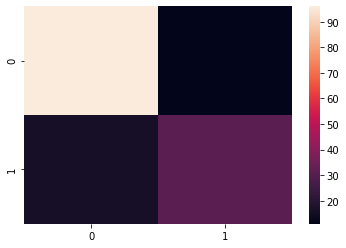

In [11]:
sns.heatmap(confusion_matrix(ytest,ypred))

In [12]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       107
           1       0.74      0.66      0.70        47

    accuracy                           0.82       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.82      0.82      0.82       154

